In [1]:
from experimental.compilers.random_opt.proto import random_opt_pb2

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pathlib
from labm8.py import viz
from labm8.py import bazelutil
from labm8.py import pbutil

In [9]:
DATA_PATH = '/tmp/phd/experimental/compilers/random_opt/random_opt.pbtxt'
data = pbutil.FromFile(pathlib.Path(DATA_PATH), random_opt_pb2.Experiment())

In [12]:
num_passes = len(data.env.candidate_pass)
num_passes

379

In [15]:
num_episodes = len(data.episode)
num_episodes

250

In [18]:
num_steps = [len(e.step) for e in data.episode]
sum(num_steps) / len(num_steps)

5.388

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6444: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


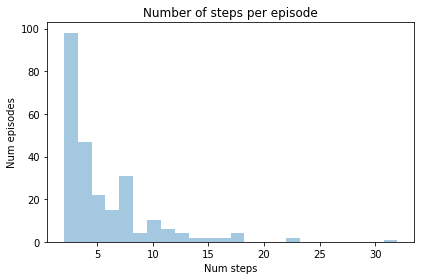

In [27]:
sns.distplot(num_steps, kde=False)
plt.xlabel('Num steps')
plt.ylabel('Num episodes')
plt.title('Number of steps per episode')
viz.finalise()

In [31]:
total_rewards = [e.step[-1].total_reward for e in data.episode]
sum(total_rewards) / len(total_rewards)

-4.710416410446167

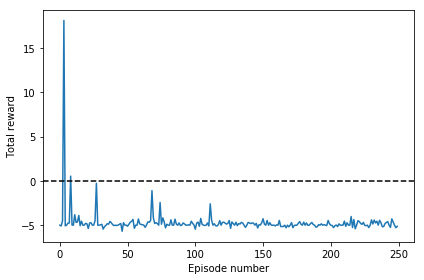

In [44]:
plt.plot(np.arange(len(total_rewards)), total_rewards)
plt.xlabel('Episode number')
plt.ylabel('Total reward')
ax = plt.gca()
ax.axhline(0, color='k', linestyle='--')
viz.finalise()

In [51]:
best_speedups = [max(s.reward for s in e.step) for e in data.episode]
sum(best_speedups) / len(best_speedups)

0.3818377957344055

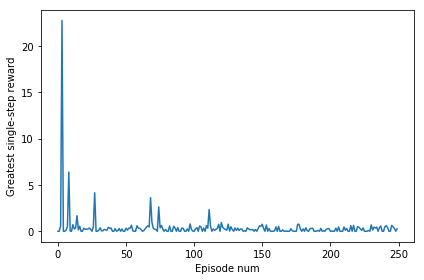

In [53]:
plt.plot(np.arange(len(best_speedups)), best_speedups)
plt.xlabel('Episode num')
plt.ylabel('Greatest single-step reward')
viz.finalise()